In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
loan = pd.read_csv('Loan_Modelling.csv')

In [4]:
data=loan.copy()

In [6]:
data.head(15)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49    91107       4    1.6          1         0   
1    2   45          19      34    90089       3    1.5          1         0   
2    3   39          15      11    94720       1    1.0          1         0   
3    4   35           9     100    94112       1    2.7          2         0   
4    5   35           8      45    91330       4    1.0          2         0   
5    6   37          13      29    92121       4    0.4          2       155   
6    7   53          27      72    91711       2    1.5          2         0   
7    8   50          24      22    93943       1    0.3          3         0   
8    9   35          10      81    90089       3    0.6          2       104   
9   10   34           9     180    93023       1    8.9          3         0   
10  11   65          39     105    94710       4    2.4          3         0   
11  12   29           5      45    90277       3    0.1          2         0   
12  13   48          23     114    93106       2    3.8          3         0   
13  14   59          32      40    94920       4    2.5          2         0   
14  15   67          41     112    91741       1    2.0          1         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0               0                   1           0       0           0  
1               0                   1           0       0           0  
2               0                   0           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           1  
5               0                   0           0       1           0  
6               0                   0           0       1           0  
7               0                   0           0       0           1  
8               0                   0           0       1           0  
9               1                   0           0       0           0  
10              0                   0           0       0           0  
11              0                   0           0       1           0  
12              0                   1           0       0           0  
13              0                   0           0       1           0  
14              0                   1           0       0           0

In [7]:
data.tail(15)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4985  4986   48          23      30    94720       3   1.70          2   
4986  4987   32           6      78    95825       1   2.90          3   
4987  4988   48          23      43    93943       3   1.70          2   
4988  4989   34           8      85    95134       1   2.50          1   
4989  4990   24           0      38    93555       1   1.00          3   
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4985       162              0                   0           0       1   
4986         0              0                   0           0       0   
4987       159              0                   0           0       1   
4988       136              0                   0           0       0   
4989         0              0                   0           0       1   
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4985           0  
4986           0  
4987           0  
4988           1  
4989           0  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [8]:
data.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns

In [9]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


- Most of the data-types are either **int64** or **float64**.

### Check for missing values

In [13]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
data.isna().apply(pd.value_counts)   #null value

ID   Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
False  5000  5000        5000    5000     5000    5000   5000       5000   

       Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
False      5000           5000                5000        5000    5000   

       CreditCard  
False        5000

- No Null Values
- No Missing Values

In [15]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

- Negative value in the ***Experience*** field (-3.0).

In [16]:
# Replacing -ve value with mean of Experience field
any(data['Experience'] < 0)

True

In [17]:
asgn_medn_expn = data.loc[:,"Experience"].median()
data.loc[:, 'Experience'].replace([-1, -2, -3], [asgn_medn_expn, asgn_medn_expn, asgn_medn_expn], inplace=True)

In [18]:
any(data['Experience'] < 0)

False

In [19]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.327600    11.253035      0.0     11.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Univariate Analysis for the continuous variables

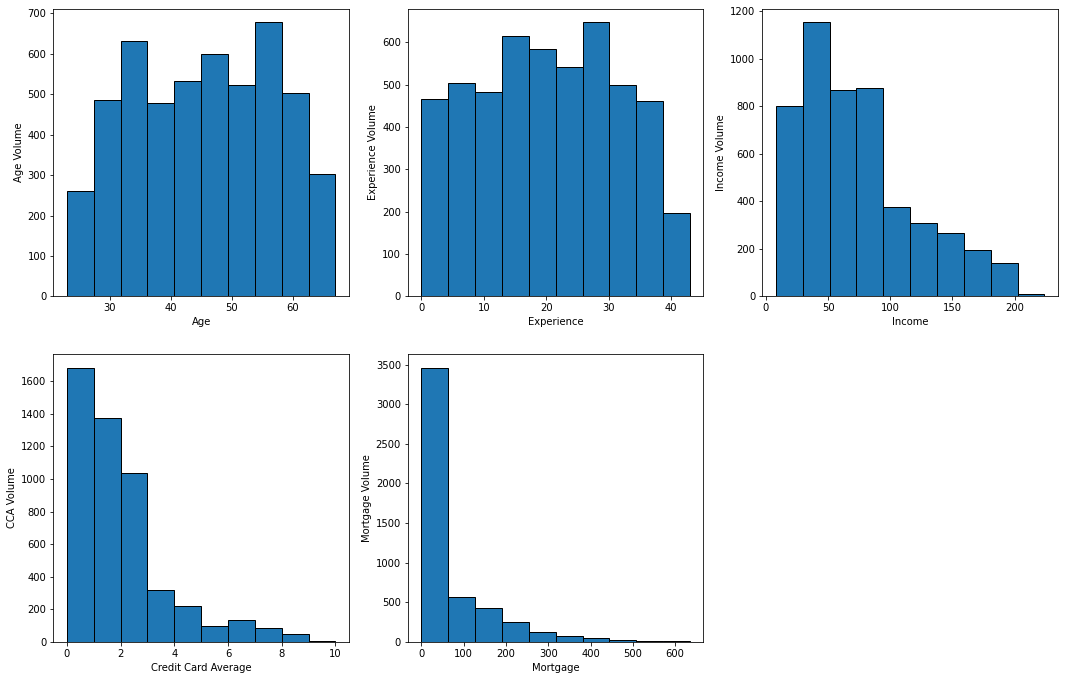

In [25]:
plt.figure(figsize= (18,18))
plt.subplot(3,3,1)
plt.hist(data.Age, edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Age Volume')

plt.subplot(3,3,2)
plt.hist(data.Experience, edgecolor = 'black')
plt.xlabel('Experience')
plt.ylabel('Experience Volume')

plt.subplot(3,3,3)
plt.hist(data.Income, edgecolor = 'black')
plt.xlabel('Income')
plt.ylabel('Income Volume')

plt.subplot(3,3,4)
plt.hist(data.CCAvg, edgecolor = 'black')
plt.xlabel('Credit Card Average')
plt.ylabel('CCA Volume')

plt.subplot(3,3,5)
plt.hist(data.Mortgage, edgecolor = 'black')
plt.xlabel('Mortgage')
plt.ylabel('Mortgage Volume')

plt.show()

- Age and Experience has normal distribution.
- Income, Credit Card Average and Mortage are highly skewness 

In [28]:
# Skewness for the above data
Uni_data_skew = pd.DataFrame({'Skewness' : [stats.skew(data.Age),stats.skew(data.Experience),stats.skew(data.Income)
                                       ,stats.skew(data.CCAvg),stats.skew(data.Mortgage)]}
                                       ,index=['Age','Experience','Income','CCAvg','Mortgage'])
Uni_data_skew

Skewness
Age        -0.029332
Experience -0.014096
Income      0.841086
CCAvg       1.597964
Mortgage    2.103371

- Age & Experience has similar skewness 
- Income, CCAvg & Mortage has positive value 

<AxesSubplot:xlabel='Mortgage'>

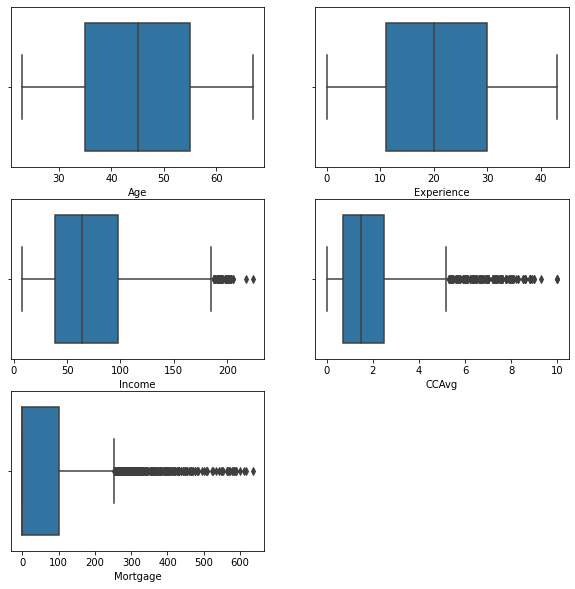

In [36]:
plt.figure(figsize= (10,10))
plt.subplot(3,2,1)
sns.boxplot(x= data.Age)

plt.subplot(3,2,2)
sns.boxplot(x= data.Experience)

plt.subplot(3,2,3)
sns.boxplot(x= data.Income)

plt.subplot(3,2,4)
sns.boxplot(x= data.CCAvg)

plt.subplot(3,2,5)
sns.boxplot(x= data.Mortgage)

- Age has normally distributed, 35 to 55 age
- Experience has normal distribution, 11 to 30 years
- Remaining field has positive skewness

### Univariate Analysis of the descrete variables

Text(0, 0.5, 'CC Volume')

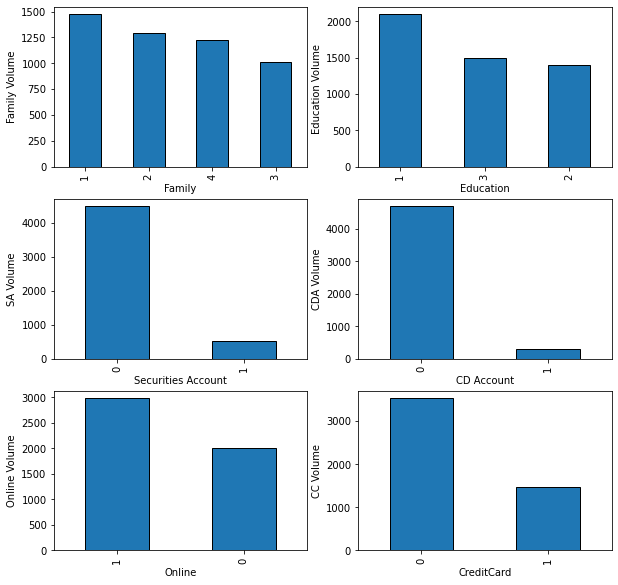

In [41]:
plt.figure(figsize=(10,10))


plt.subplot(3,2,1)
data['Family'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel("Family")
plt.ylabel("Family Volume")

plt.subplot(3,2,2)
data['Education'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel('Education')
plt.ylabel('Education Volume ')

plt.subplot(3,2,3)
data['Securities_Account'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel('Securities Account')
plt.ylabel('SA Volume')

plt.subplot(3,2,4)
data['CD_Account'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel('CD Account')
plt.ylabel('CDA Volume')

plt.subplot(3,2,5)
data['Online'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel('Online')
plt.ylabel('Online Volume')

plt.subplot(3,2,6)
data['CreditCard'].value_counts().plot(kind="bar", edgecolor = 'black')
plt.xlabel('CreditCard')
plt.ylabel('CC Volume')

- Family and Education has normal distribution
- Variate in the Securities Account and CD Account

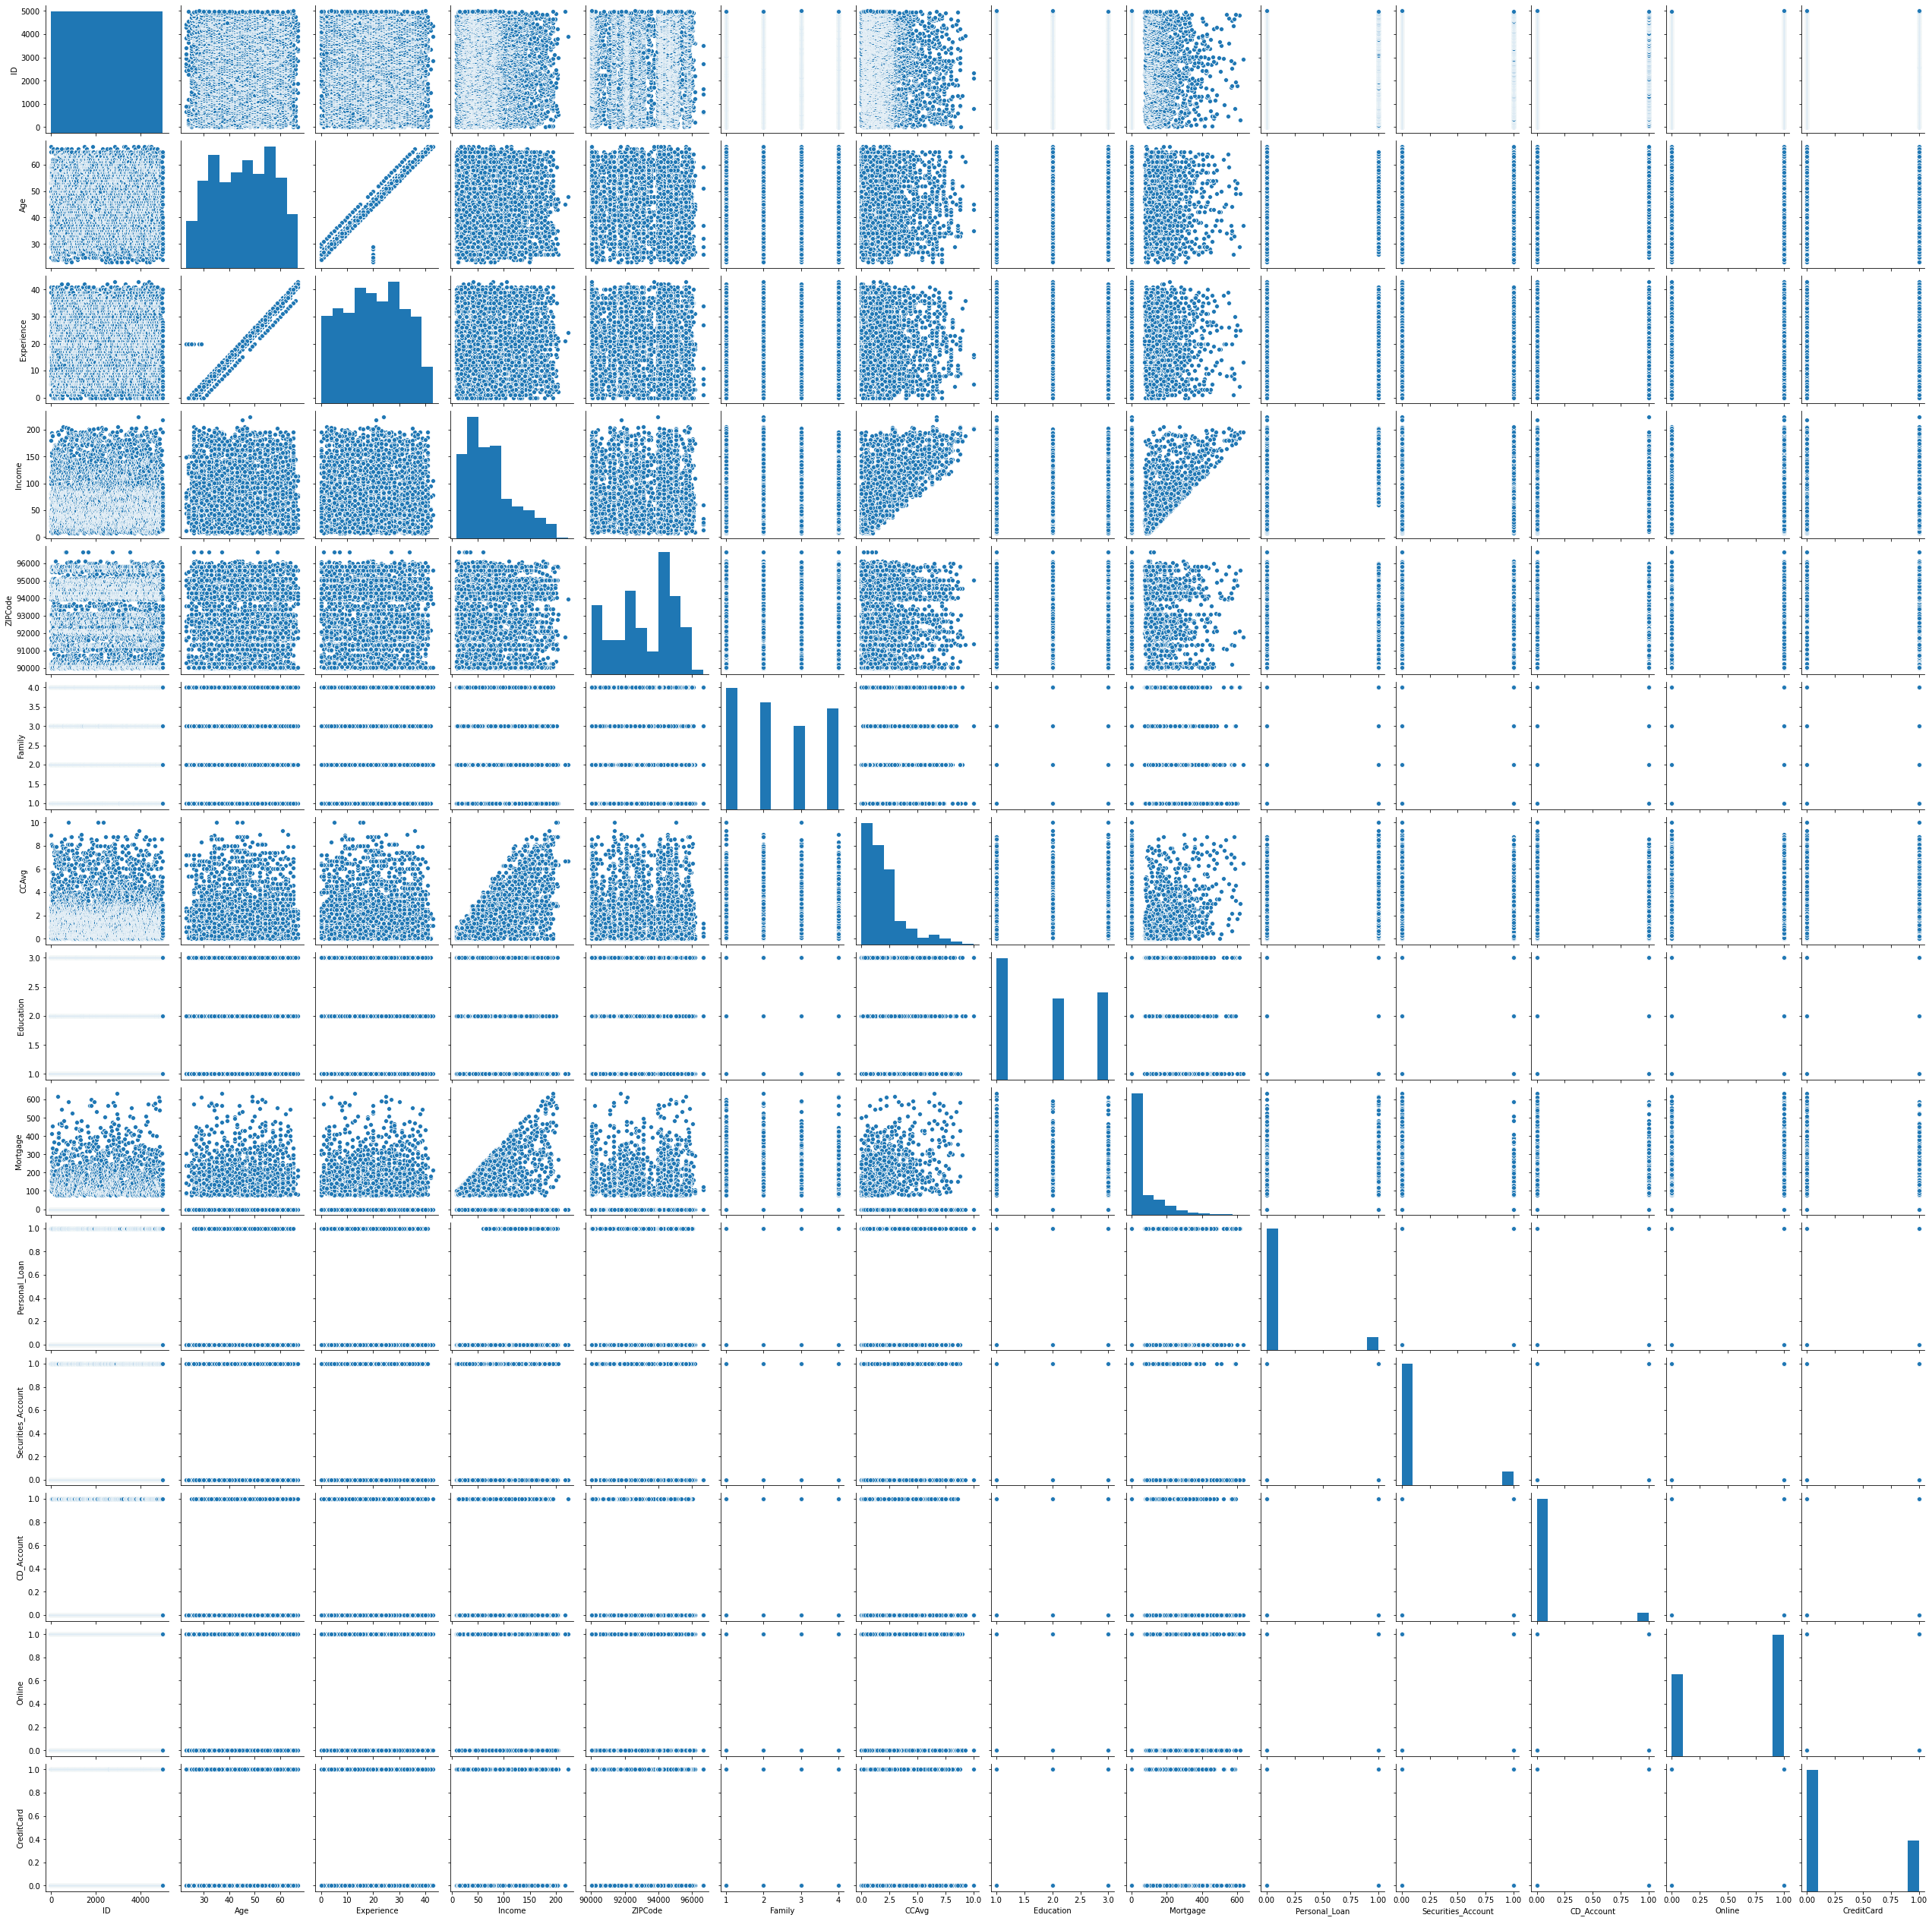

In [42]:
# pair plot
sns.pairplot(data)

### Checking dependent variable 

In [45]:
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

Text(0, 0.5, 'PL Volume')

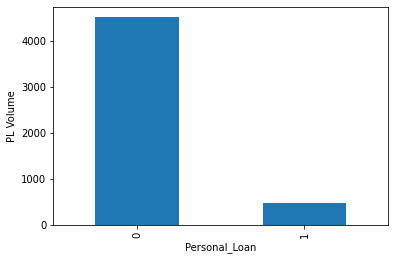

In [53]:
pd.value_counts(data["Personal_Loan"]).plot(kind="bar")
plt.xlabel("Personal_Loan")
plt.ylabel("PL Volume")

### Comparison charts using different variables by depandent variable

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

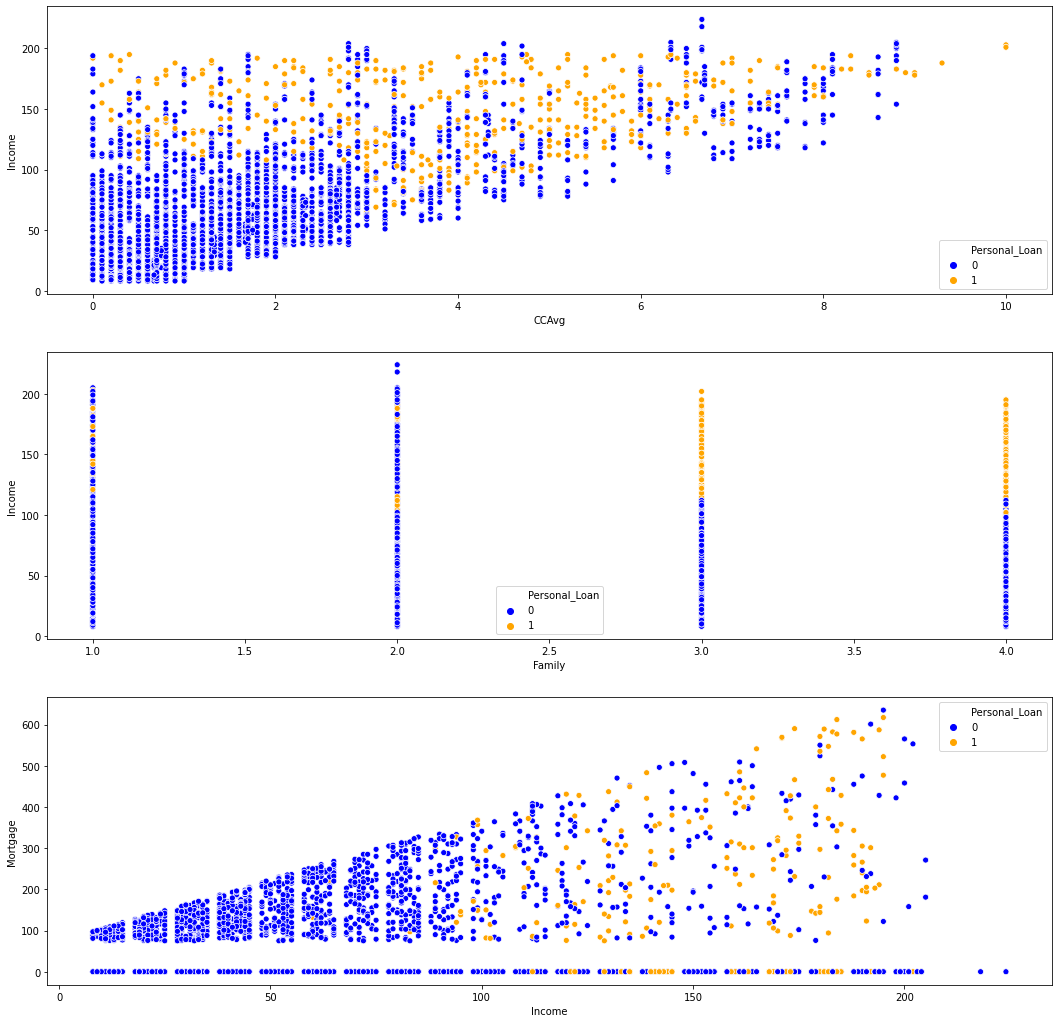

In [60]:
plt.figure(figsize=(18,18))

plt.subplot(3,1,1)
sns.scatterplot(data.CCAvg, data.Income, hue = data['Personal_Loan'], palette= ['blue','orange'])

plt.subplot(3,1,2)
sns.scatterplot(data.Family, data.Income, hue = data['Personal_Loan'], palette= ['blue','orange'])

plt.subplot(3,1,3)
sns.scatterplot(data.Income, data.Mortgage, hue = data['Personal_Loan'], palette= ['blue','orange'])


- Based on CCAvg, Family & Income increases, personal loan also got increasing

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

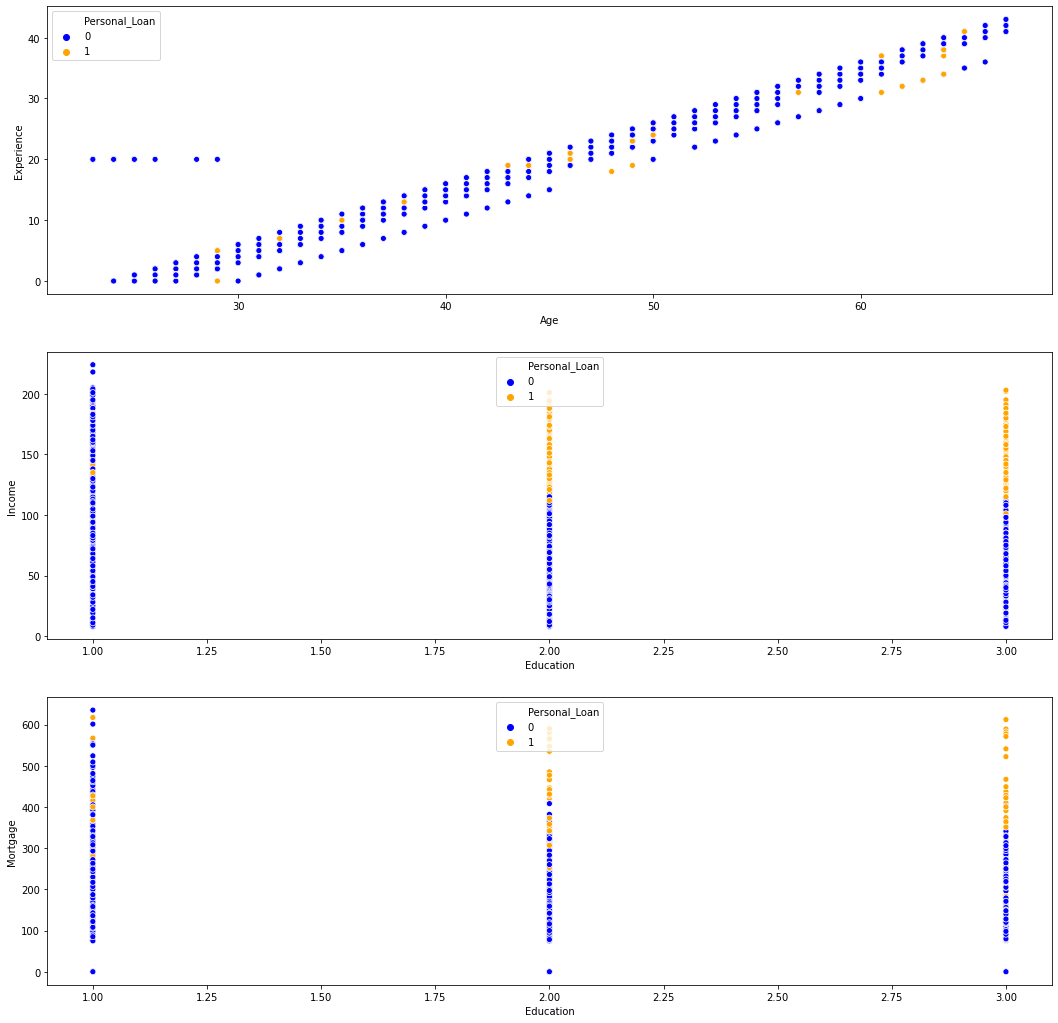

In [61]:
plt.figure(figsize=(18,18))

plt.subplot(3,1,1)
sns.scatterplot(data.Age, data.Experience, hue = data['Personal_Loan'], palette= ['blue','orange'])

plt.subplot(3,1,2)
sns.scatterplot(data.Education, data.Income, hue = data['Personal_Loan'], palette= ['blue','orange'])

plt.subplot(3,1,3)
sns.scatterplot(data.Education, data.Mortgage, hue = data['Personal_Loan'], palette= ['blue','orange'])

### Comparing Categorical data by Personal Loan

<AxesSubplot:xlabel='CD_Account', ylabel='count'>

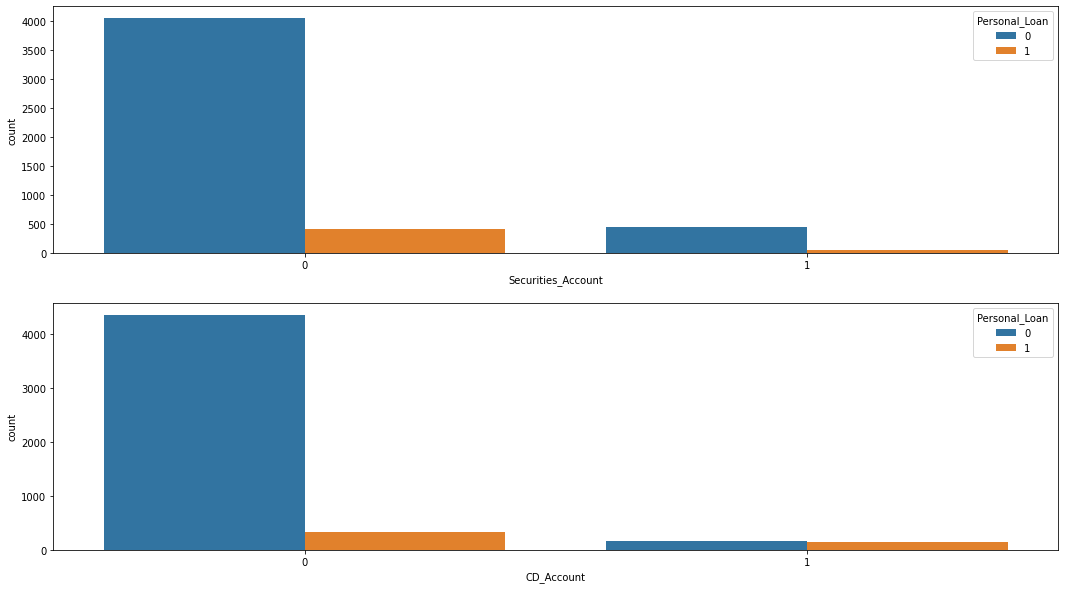

In [64]:
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
sns.countplot(x="Securities_Account", data=data ,hue="Personal_Loan")

plt.subplot(2,1,2)
sns.countplot(x='CD_Account' ,data=data ,hue='Personal_Loan')

<AxesSubplot:xlabel='Income'>

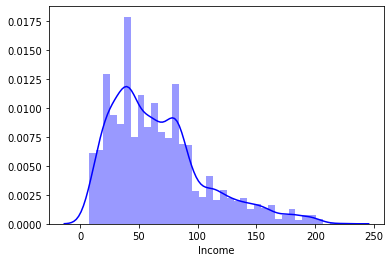

In [68]:
sns.distplot(data[data["Personal_Loan"] == 0]['Income'], color = 'blue')

<AxesSubplot:xlabel='Income'>

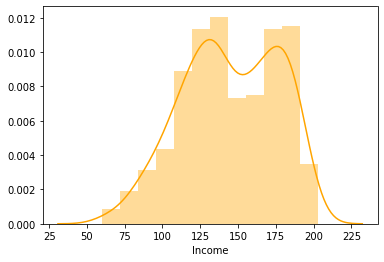

In [70]:
sns.distplot(data[data["Personal_Loan"] == 1]['Income'], color = 'orange')

- Above comparison chart, based on income vs personal loan

In [71]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
  
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

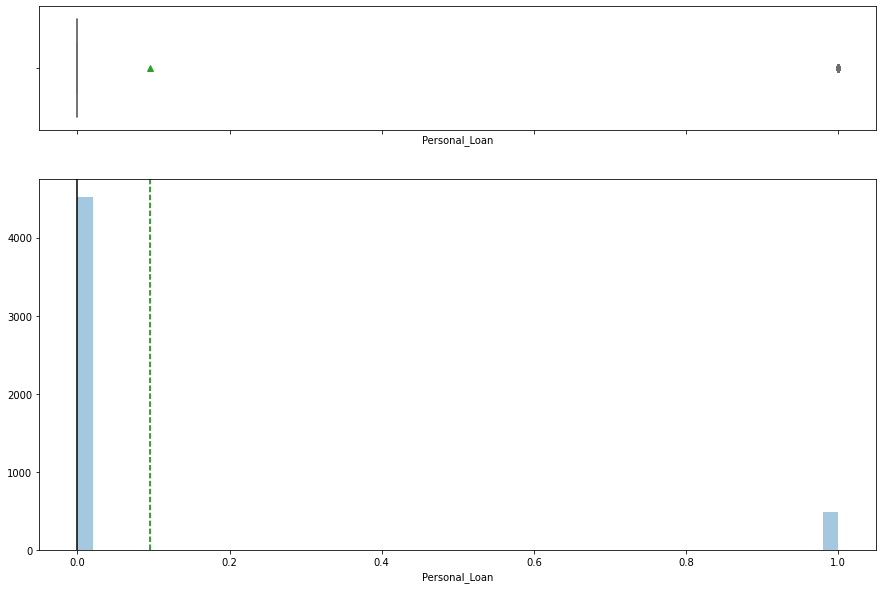

In [72]:
histogram_boxplot(data["Personal_Loan"])

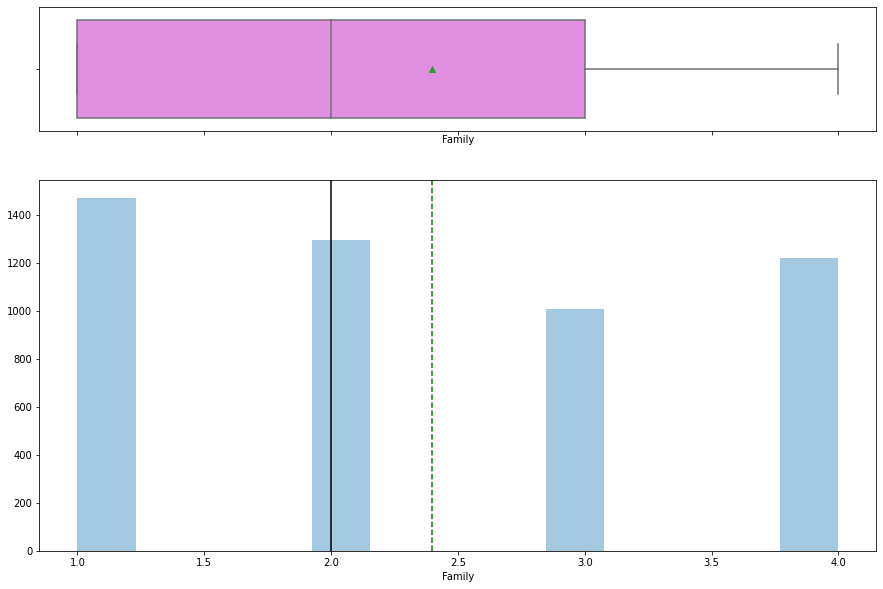

In [73]:
histogram_boxplot(data["Family"])

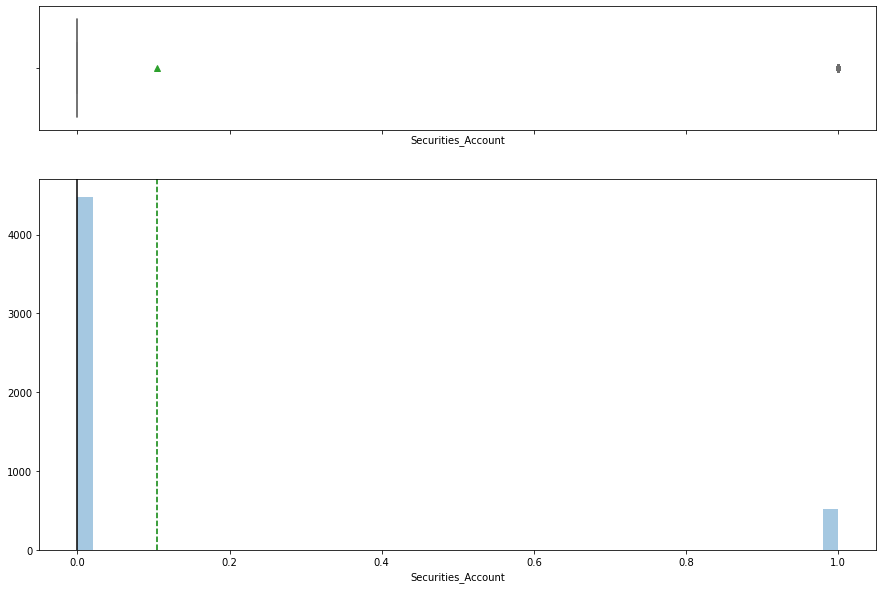

In [74]:
histogram_boxplot(data["Securities_Account"])

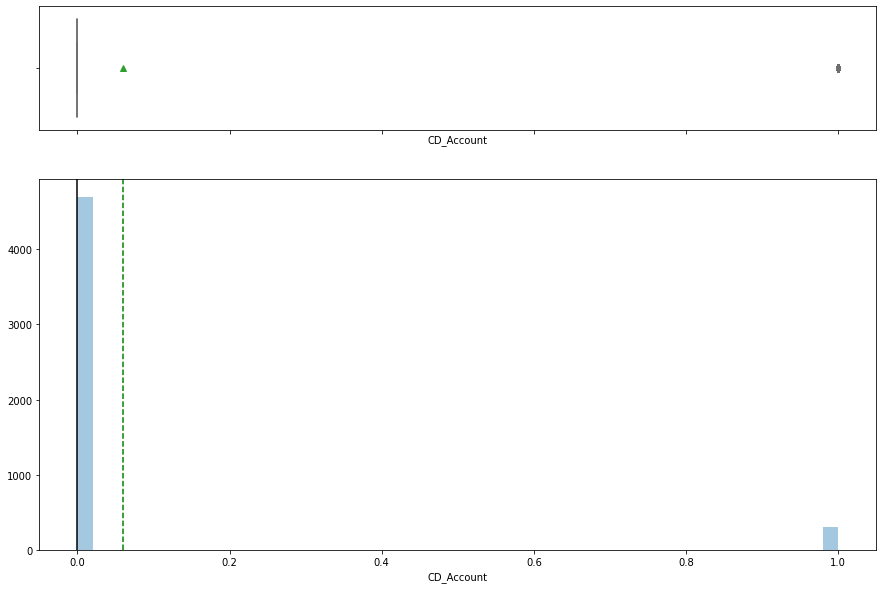

In [75]:
histogram_boxplot(data["CD_Account"])

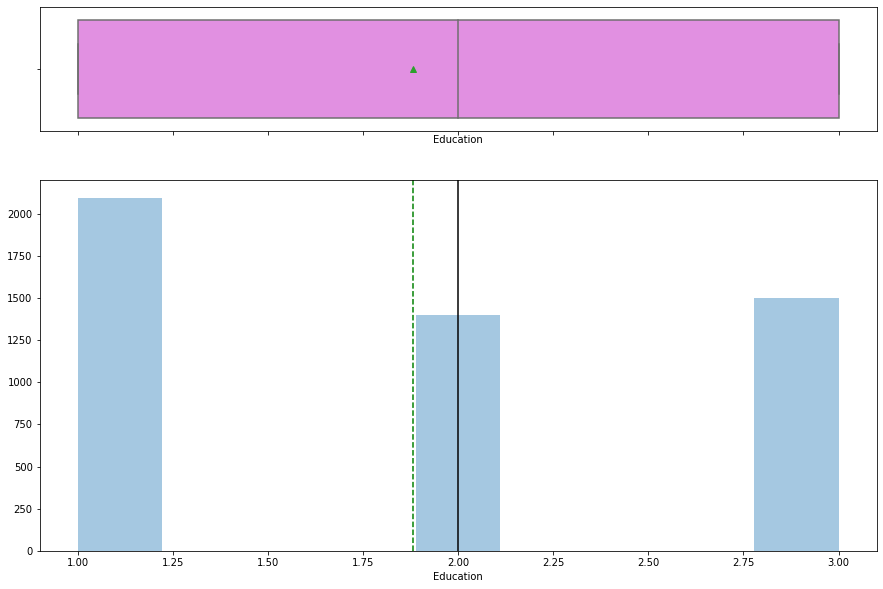

In [76]:
histogram_boxplot(data["Education"])

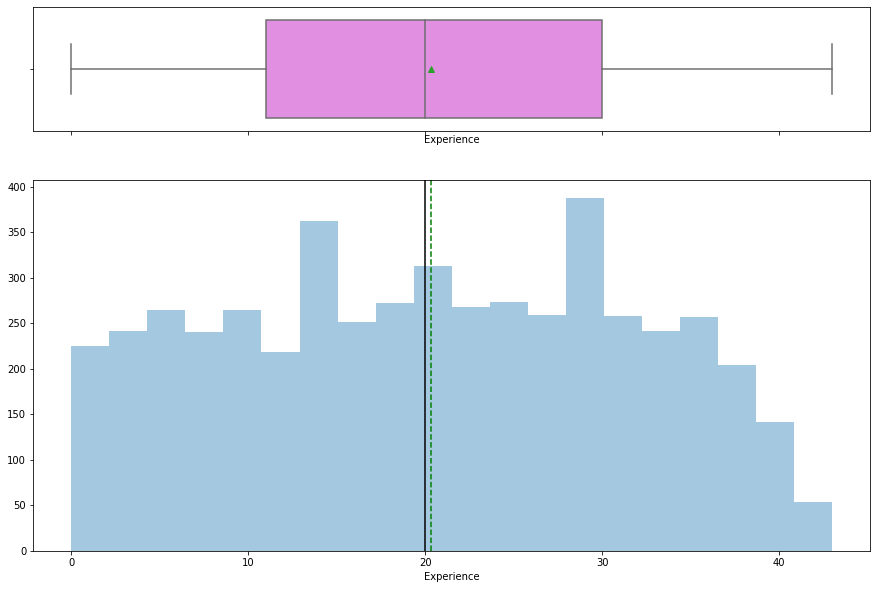

In [77]:
histogram_boxplot(data["Experience"])

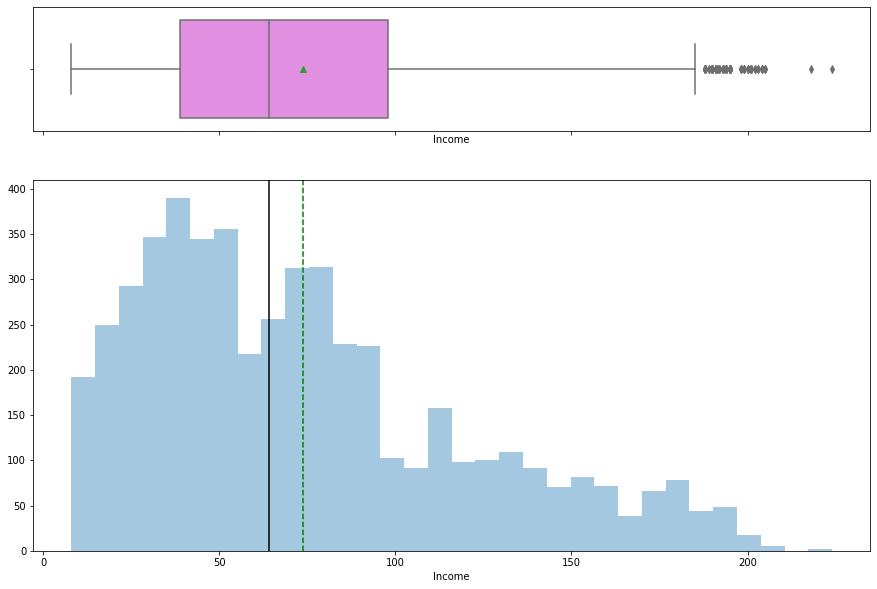

In [78]:
histogram_boxplot(data["Income"])

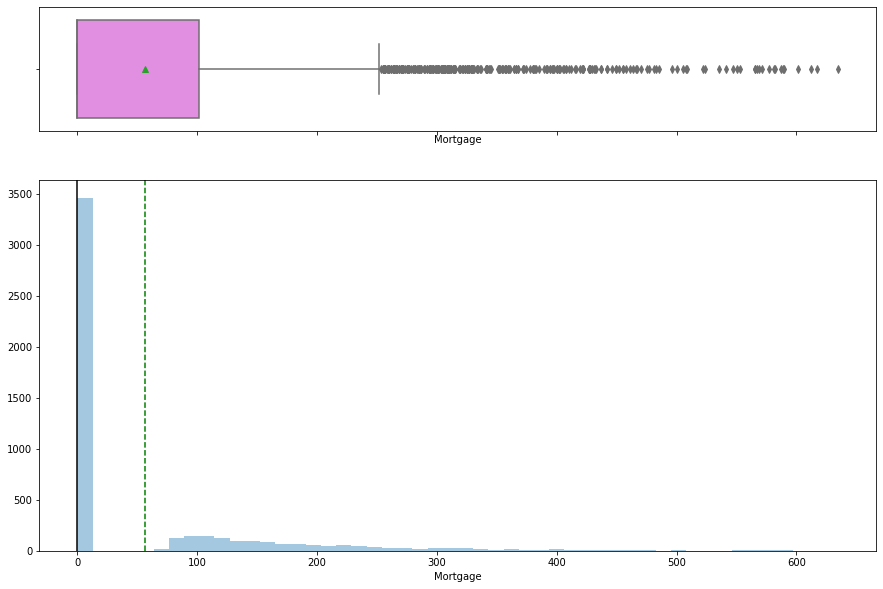

In [79]:
histogram_boxplot(data["Mortgage"])

### Bivariate Analysis

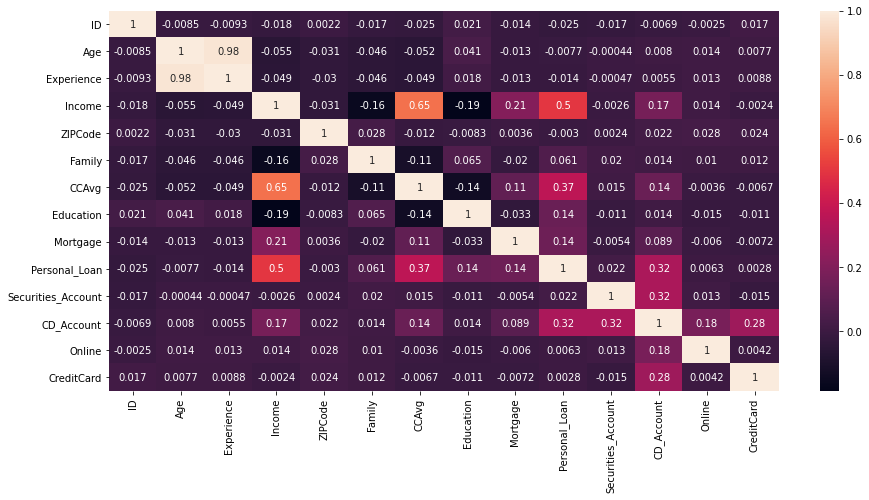

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

- Income shows the highest correlation with CCAvg (0.65) 
- Age and Experience are very highly correlated(0.98) with each other.
- Age and Experience are highly correlated and the correlation is almost 1.
- 'Income' and 'CCAvg' is moderately correlated.
- We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
- 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

In [83]:
data[['Personal_Loan', 'Age', 'Income', 'CCAvg', 'Mortgage', 'Experience']].corr()

Personal_Loan       Age    Income     CCAvg  Mortgage  \
Personal_Loan       1.000000 -0.007726  0.502462  0.366889  0.142095   
Age                -0.007726  1.000000 -0.055269 -0.052012 -0.012539   
Income              0.502462 -0.055269  1.000000  0.645984  0.206806   
CCAvg               0.366889 -0.052012  0.645984  1.000000  0.109905   
Mortgage            0.142095 -0.012539  0.206806  0.109905  1.000000   
Experience         -0.014013  0.977182 -0.049046 -0.048718 -0.013365   

               Experience  
Personal_Loan   -0.014013  
Age              0.977182  
Income          -0.049046  
CCAvg           -0.048718  
Mortgage        -0.013365  
Experience       1.000000

<AxesSubplot:>

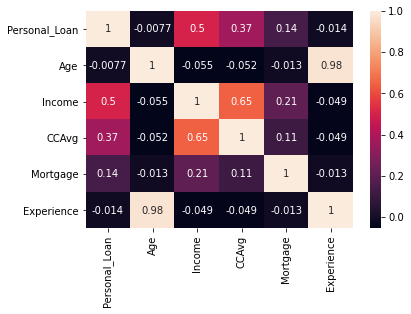

In [85]:
sns.heatmap(data[['Personal_Loan', 'Age', 'Income', 'CCAvg', 'Mortgage', 'Experience']].corr(), annot = True)

<AxesSubplot:>

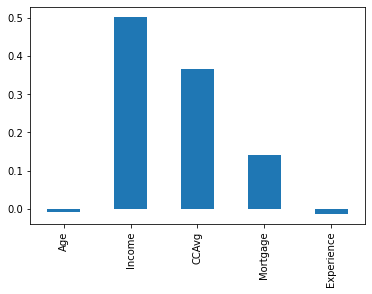

In [88]:
data[['Personal_Loan', 'Age', 'Income', 'CCAvg', 'Mortgage', 'Experience']].corr()['Personal_Loan'][1:].plot.bar()

- Income & CCAvg shows the highest correlation

#### Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [169]:
column_names = list(data.columns)
column_names.remove('Personal_Loan') 
#column_names.remove('ID') 
#column_names.remove('ZIPCode') 
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


In [91]:
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [93]:
train_labels = train_set.pop('Personal_Loan')
test_labels = test_set.pop('Personal_Loan')

In [95]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal_Loan" , axis = 1)
train_set_dep = data["Personal_Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [108]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [99]:
X = data.drop('Personal_Loan',axis=1)                                                 
y = data['Personal_Loan'].astype('int64')

In [100]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 13) (1500, 13)


### Logistic Regression

In [116]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [117]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

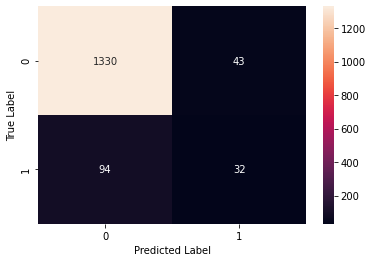

In [361]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [121]:
# Classification Report
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499



In [345]:
print('Accuracy on train set: {:.2f}'.format(logmodel.score(X_Train, Y_Train)))
print('Accuracy on test set: {:.2f}'.format(logmodel.score(X_Test, Y_Test)))
print('Recall score: {:.2f}'.format(recall_score(Y_Test,predicted)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(Y_Test,predicted)))
print('Precision score: {:.2f}'.format(precision_score(Y_Test,predicted)))

Accuracy on train set: 0.91
Accuracy on test set: 0.91
Recall score: 0.25
ROC AUC score: 0.61
Precision score: 0.43


### Insights:

- True Positive (observed=1,predicted=1): Model predicted that 32 customers shall take Personal loan and they customer took it
- False Positive (observed=0,predicted=1): Model Predicted 43 Personal loan will take, and the customer did not take it, but bank didn't loose any money
- True Negative (observed=0,predicted=0): Model Predicted 1330 Personal loan will not take, and the customer did not take it
- False Negative (observed=1,predicted=0): Model Predicted 94 Personal loan will not take, and the customer took it - This is where model should have done better

## Build Decision Tree Model

In [145]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [147]:
model.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [362]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_Test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 0","Actual - 1"]],
                  columns = [i for i in ['Predicted - 0','Predicted - 1']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

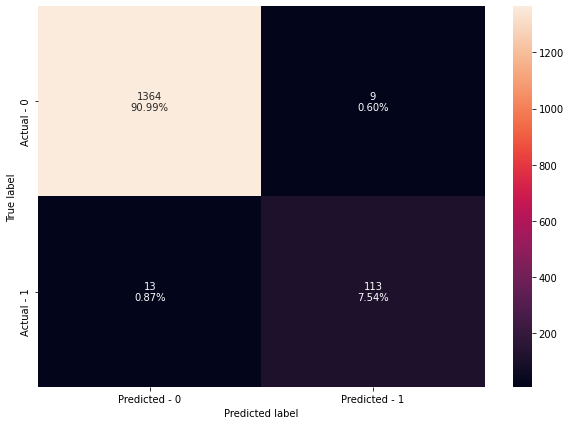

In [363]:
make_confusion_matrix(model,Y_Test)

In [365]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

We  have 90.99% of positive.

In [160]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_Train)
    pred_test = model.predict(X_Test)
    print("Recall on training set : ",metrics.recall_score(Y_Train,pred_train))
    print("Recall on test set : ",metrics.recall_score(Y_Test,pred_test))

In [161]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8968253968253969


* There is no huge disparity in performance of model on training set and test set

## Visualizing the Decision Tree

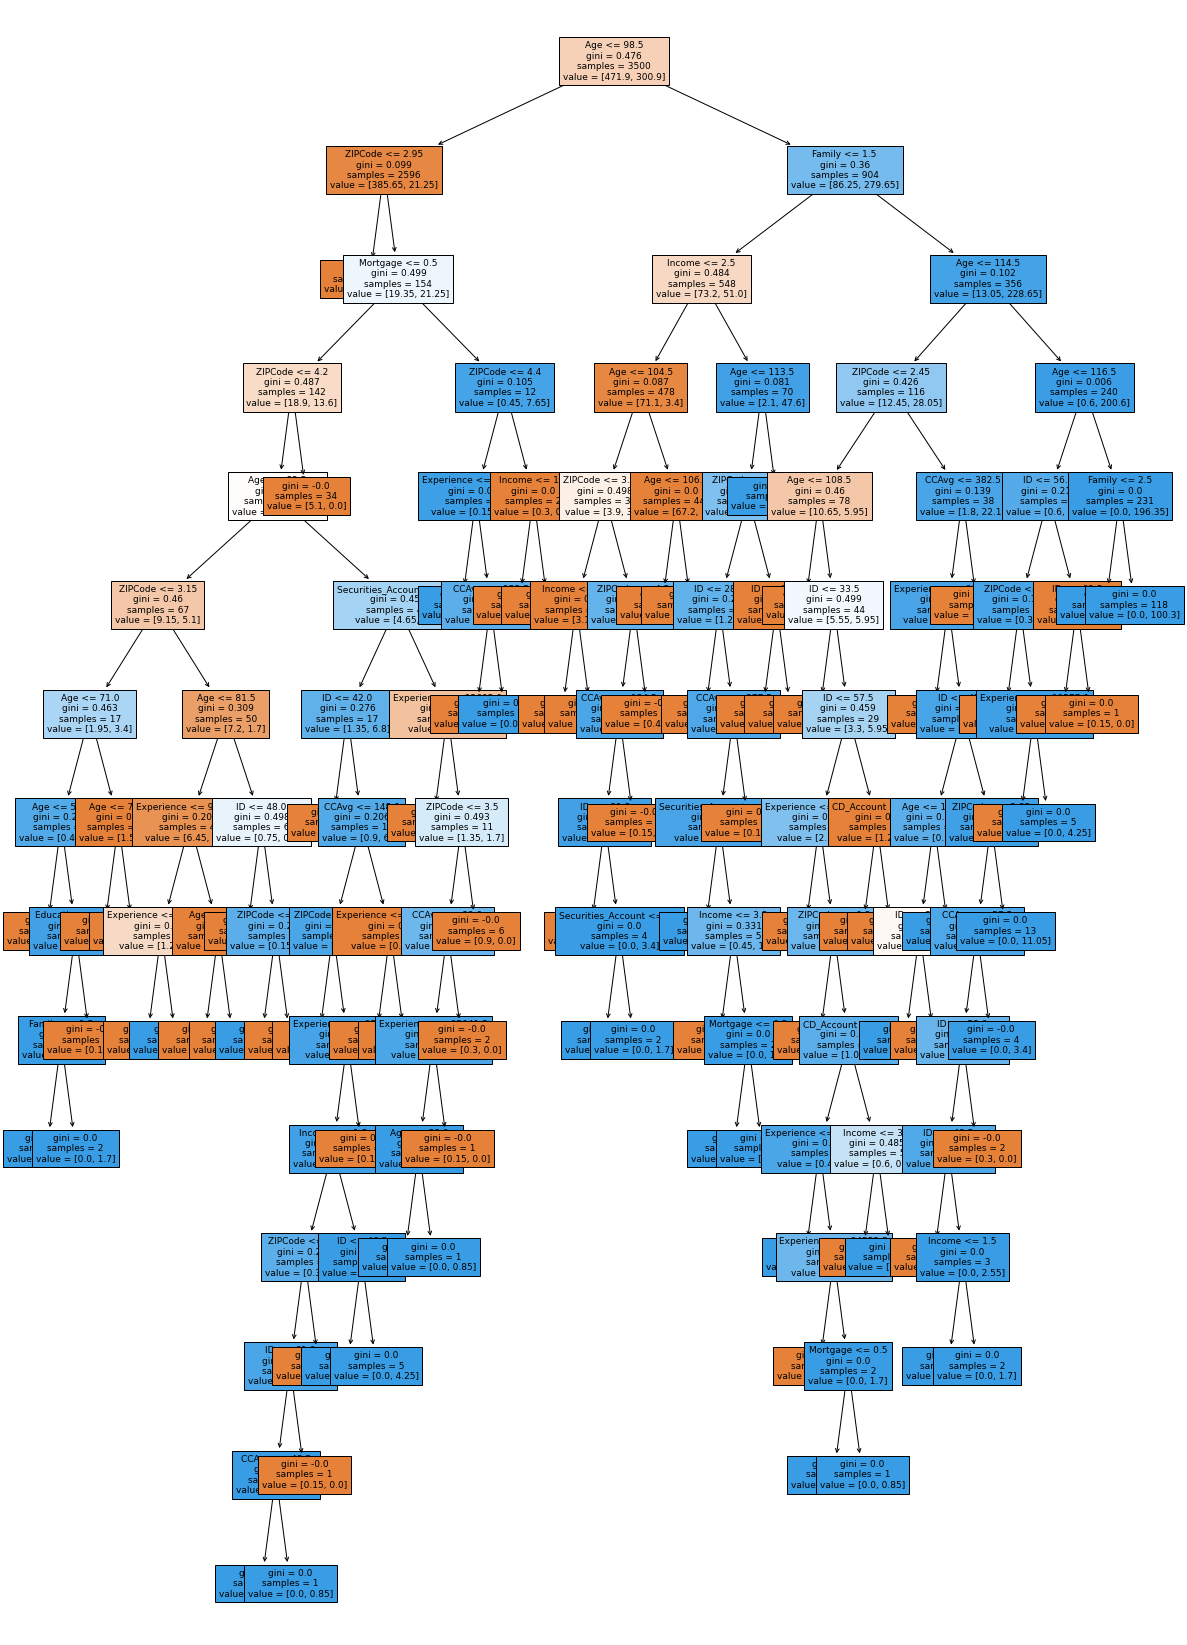

In [165]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [170]:
# Text report showing the rules of a decision tree 
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Experience <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [366.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 4.20
|   |   |   |   |--- Experience <= 82.50
|   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |--- Experience <= 71.00
|   |   |   |   |   |   |   |--- Experience <= 59.50
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |--- Experience >  59.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  71.0

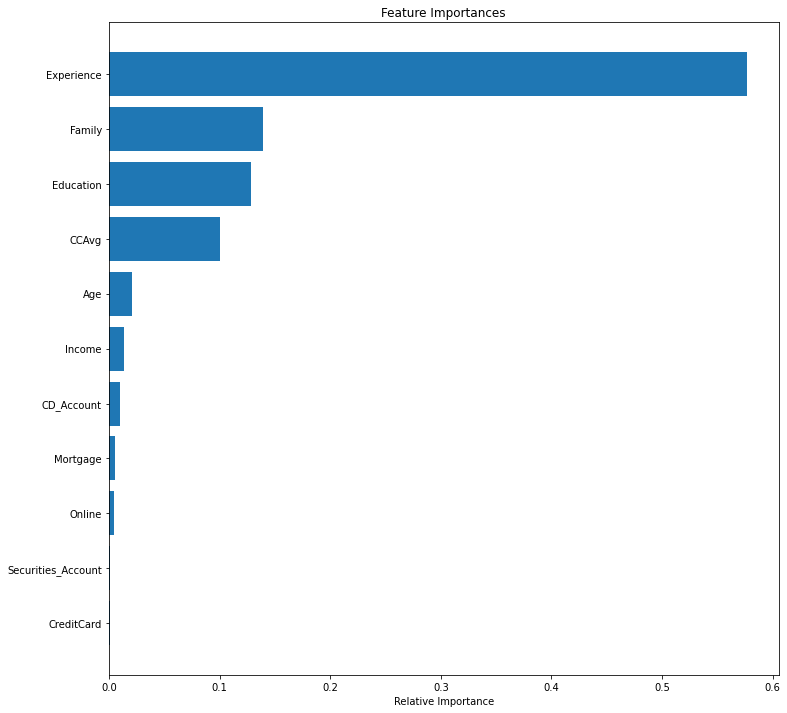

In [317]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Experience & Family are at the top two important features to predict

## Reducing over fitting

In [204]:
from sklearn.model_selection import GridSearchCV

In [208]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_Train, Y_Train)

estimator = grid_obj.best_estimator_

estimator.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1)

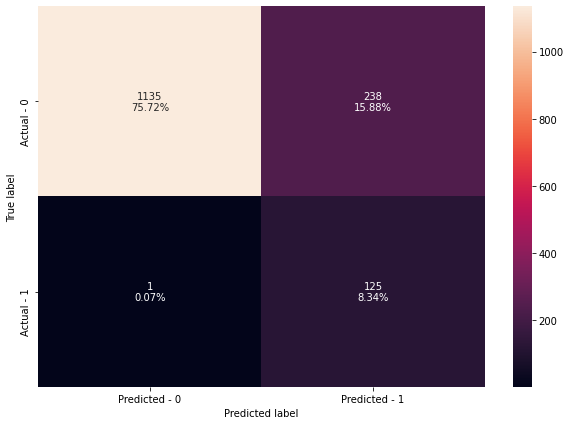

In [367]:
make_confusion_matrix(estimator,Y_Test)

In [210]:
get_recall_score(estimator)

Recall on training set :  0.9774011299435028
Recall on test set :  0.9920634920634921


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

### Visualizing the Decision Tree

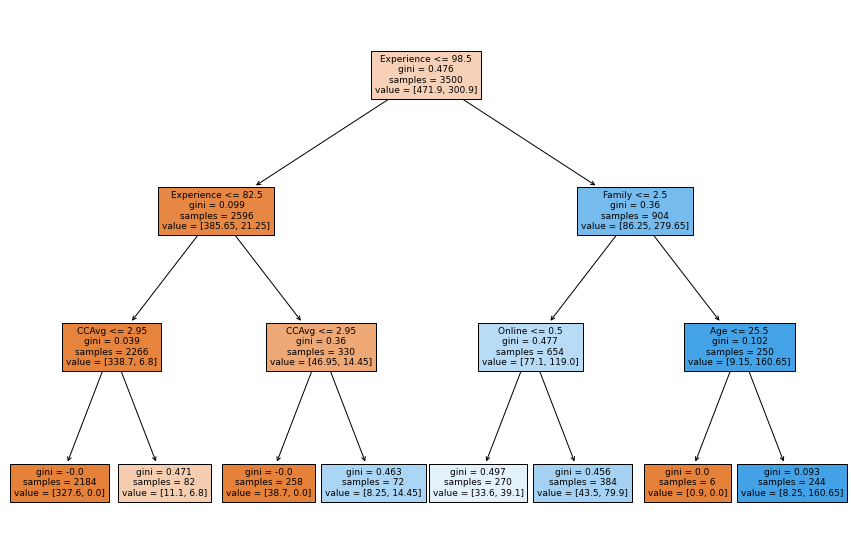

In [211]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [212]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Experience <= 98.50
|   |--- Experience <= 82.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- weights: [327.60, 0.00] class: 0
|   |   |--- CCAvg >  2.95
|   |   |   |--- weights: [11.10, 6.80] class: 0
|   |--- Experience >  82.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- weights: [38.70, 0.00] class: 0
|   |   |--- CCAvg >  2.95
|   |   |   |--- weights: [8.25, 14.45] class: 1
|--- Experience >  98.50
|   |--- Family <= 2.50
|   |   |--- Online <= 0.50
|   |   |   |--- weights: [33.60, 39.10] class: 1
|   |   |--- Online >  0.50
|   |   |   |--- weights: [43.50, 79.90] class: 1
|   |--- Family >  2.50
|   |   |--- Age <= 25.50
|   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |--- Age >  25.50
|   |   |   |--- weights: [8.25, 160.65] class: 1



In [215]:
columns_ = data.iloc[:1, 3:12].columns

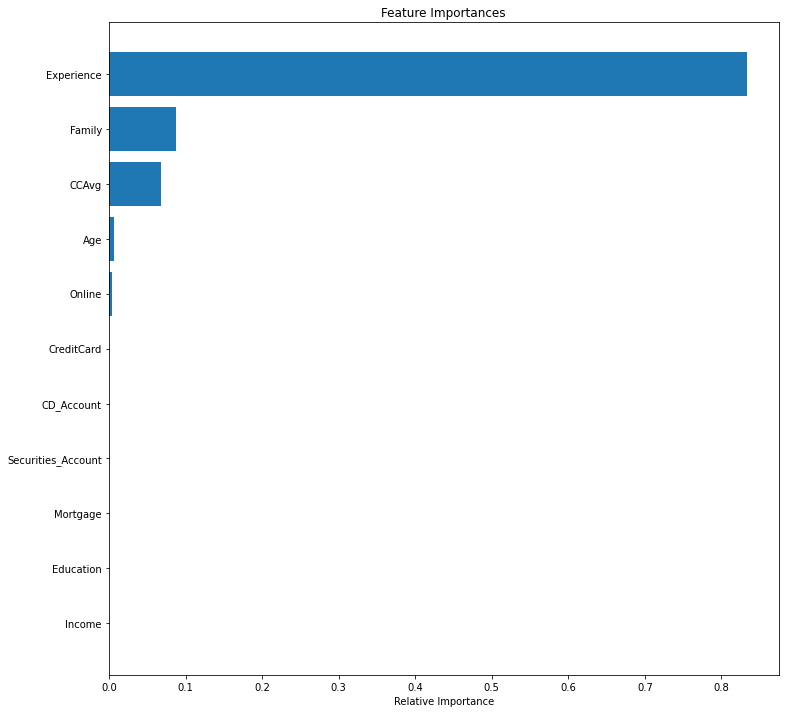

In [316]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Experience & Family are at the top two important features to predict

## Cost Complexity Pruning

In [219]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [220]:
pd.DataFrame(path)

ccp_alphas    impurities
0    0.000000e+00 -4.911640e-16
1    1.320471e-19 -4.910320e-16
2    4.401571e-19 -4.905918e-16
3    7.482671e-19 -4.898435e-16
4    7.482671e-19 -4.890953e-16
..            ...           ...
361  2.051615e-03  4.312055e-01
362  2.223356e-03  4.378755e-01
363  2.227902e-03  4.401034e-01
364  2.299737e-03  4.470027e-01
365  2.516616e-03  4.671356e-01

[366 rows x 2 columns]

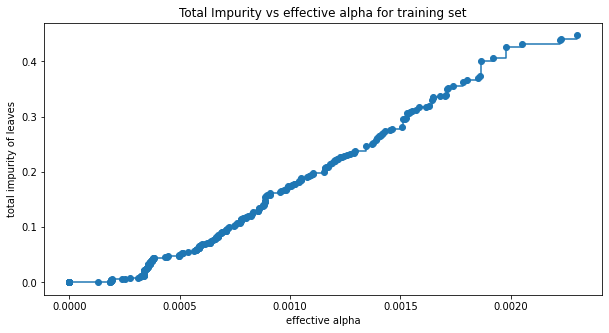

In [221]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [222]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0025166156542417786


#### For the remainder, we remove the last element in clfs and ccp_alphas

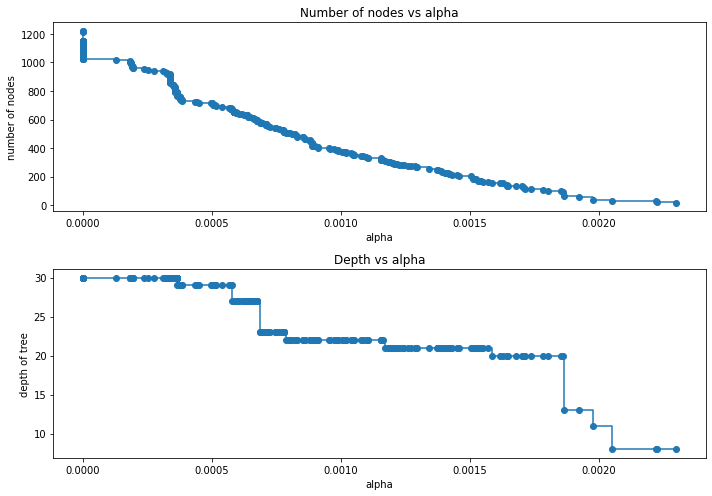

In [223]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [224]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [231]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]

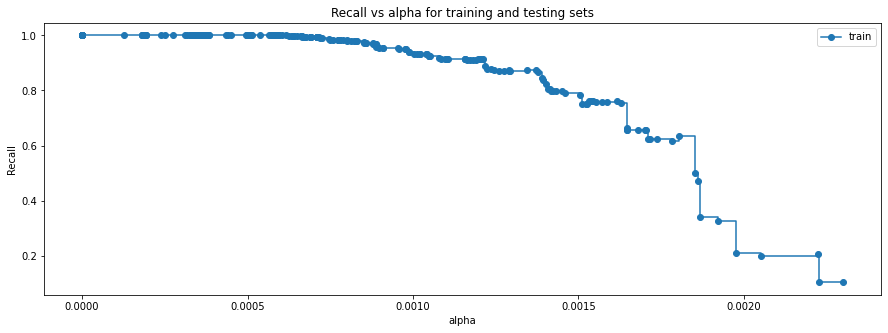

In [265]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)

ax.legend()
plt.show()

In [277]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_train)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [291]:
best_model.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

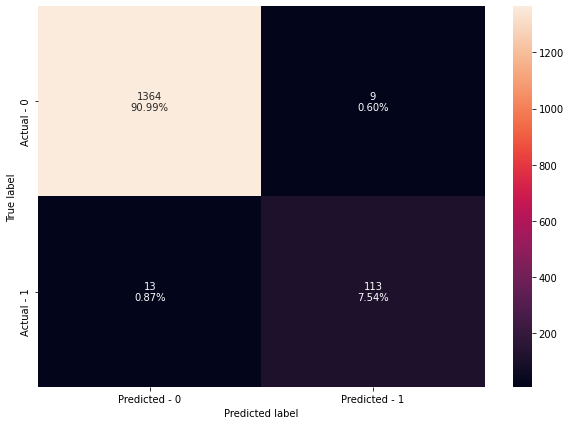

In [368]:
make_confusion_matrix(best_model,Y_Test)

## Visualizing the Decision Tree

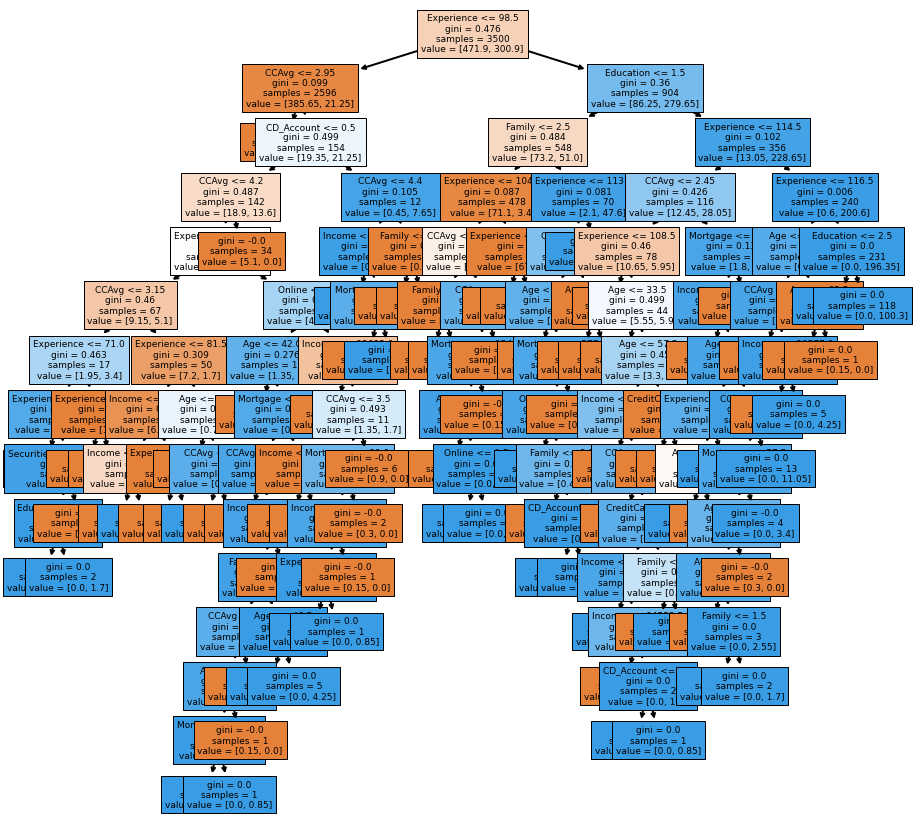

In [308]:
plt.figure(figsize=(15,15))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
plt.show()

In [287]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_Train, Y_Train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

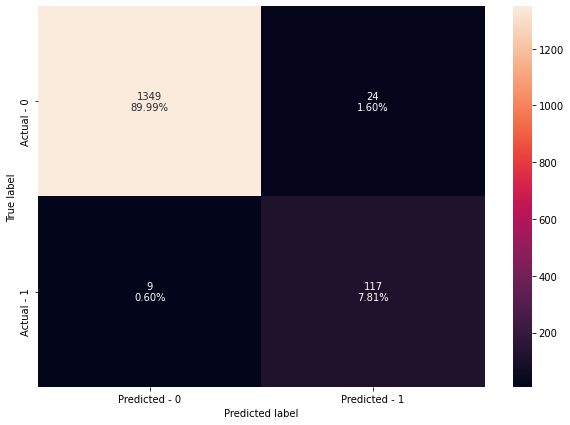

In [369]:
make_confusion_matrix(best_model2,Y_Test)

* We are able to identify more True positives - 89.99%

In [309]:
get_recall_score(best_model2)

Recall on training set :  0.9548022598870056
Recall on test set :  0.9285714285714286


### Visualizing the Decision Tree

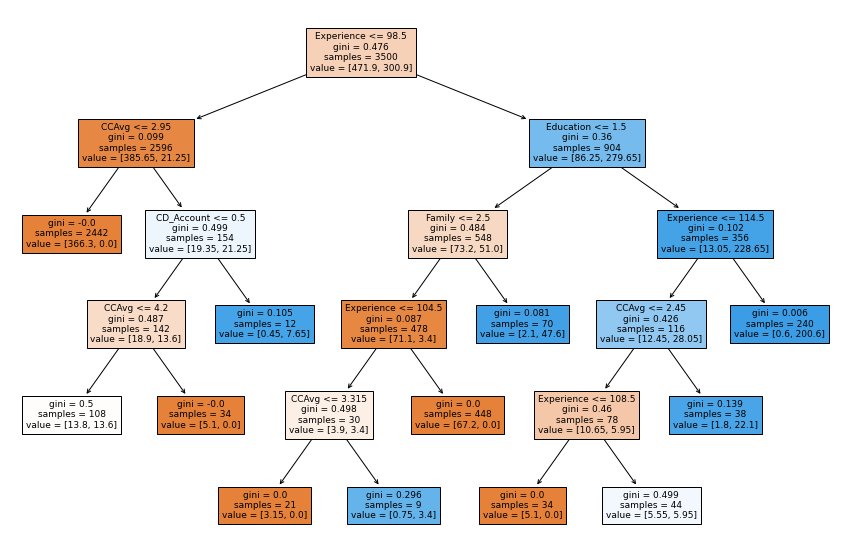

In [310]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [311]:
print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Experience <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [366.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 4.20
|   |   |   |   |--- weights: [13.80, 13.60] class: 0
|   |   |   |--- CCAvg >  4.20
|   |   |   |   |--- weights: [5.10, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.45, 7.65] class: 1
|--- Experience >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Experience <= 104.50
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [3.15, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |--- weights: [0.75, 3.40] class: 1
|   |   |   |--- Experience >  104.50
|   |   |   |   |--- weights: [67.20, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.10, 47.60] class: 1
|   |--- Education >  1.50
|   |   |--- Experience <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- Experience <= 108.50
|

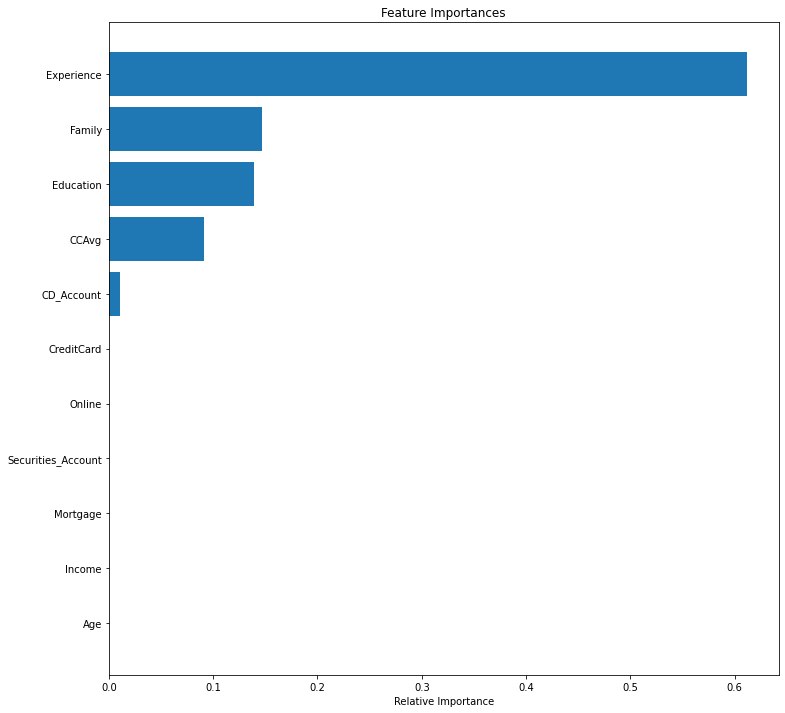

In [315]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Experience & Family are at the top two important features to predict

### Comparing all the decision tree models

In [319]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.97,0.95], 'Test_Recall':[0.89,0.99,0.93]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.89
1  Decision treee with hyperparameter tuning          0.97         0.99
2            Decision tree with post-pruning          0.95         0.93

**Decision tree model with hyperparameter tuning has given the best recall score on data.**

### Conclusion and Recommendations

- I have analyzed the "Personal Loan" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict which feature is going to contribute to Personal loan generation.
- Visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- Verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Experience, Family, Education, CCAvg and CC_Account are the most important variable in predicting the customers that will contribute to the revenue.
- The aim of the Bank is to convert there liability customers into loan customers.
- It seems like 'Logistic Regression' algorithm & Decision tree model with hyperparameter tuning' have the highest accuracy and we can choose that as our final model